In [1]:
# Data Manipulation
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns            # For statistical data visualization

# Clustering Algorithms
from sklearn.cluster import KMeans         # For K-means clustering
from sklearn.cluster import AgglomerativeClustering  # For hierarchical clustering
from sklearn.cluster import SpectralClustering      # For spectral clustering
from sklearn.mixture import GaussianMixture        # For Gaussian Mixture Models

# Model Evaluation
from sklearn.metrics import silhouette_score  # To evaluate the quality of clusters
from sklearn.metrics import pairwise_distances_argmin_min  # To find closest points to cluster centers

# Data Preprocessing
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.decomposition import PCA              # For dimensionality reduction if needed

# Additional Libraries (if needed)
import scipy.cluster.hierarchy as sch  # For hierarchical clustering and dendrograms


## Data Ingestion & Initial Checks

In [3]:
df = pd.read_csv('./Dataset/bank_marketing.csv')

In [4]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

no null values

## Exploratory Data Analysis

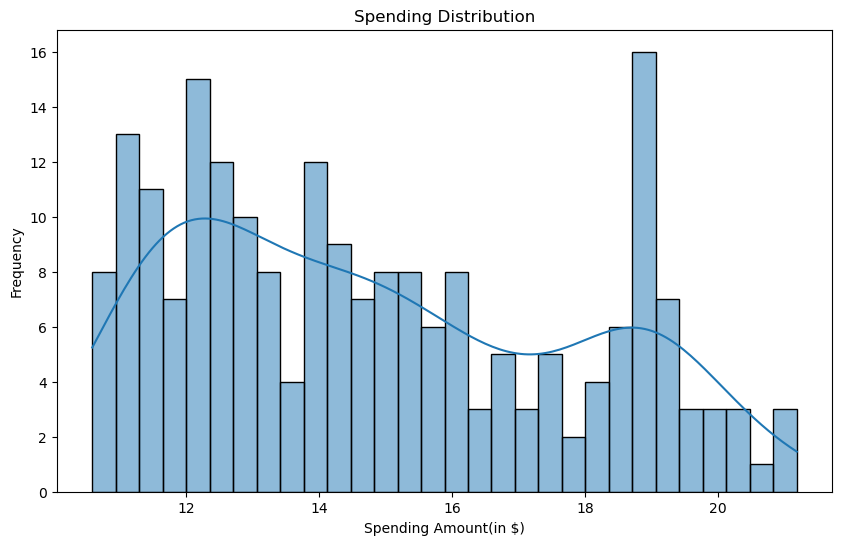

In [9]:
# Transaction Patterns

# Plotting spending distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['spending'], bins=30, kde=True)
plt.title('Spending Distribution')
plt.xlabel('Spending Amount(in $)')
plt.ylabel('Frequency')
plt.show()


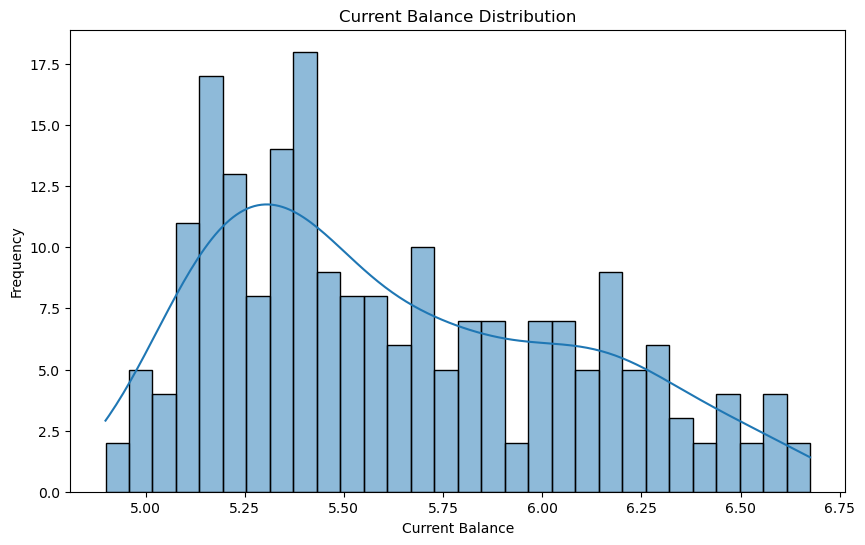

In [10]:
# Account Balance Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['current_balance'], bins=30, kde=True)
plt.title('Current Balance Distribution')
plt.xlabel('Current Balance')
plt.ylabel('Frequency')
plt.show()

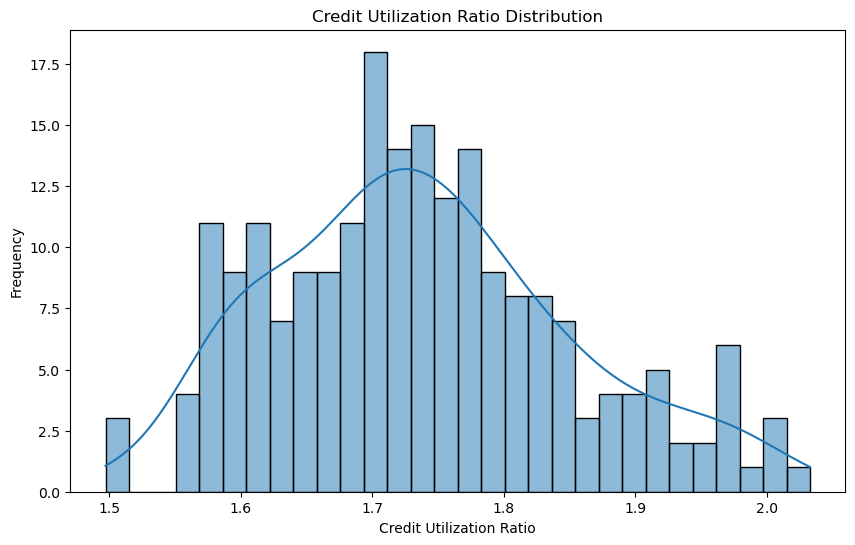

In [11]:
# Credit Utilization Ratios

# Calculate credit utilization ratio
df['credit_utilization'] = df['current_balance'] / df['credit_limit']

plt.figure(figsize=(10, 6))
sns.histplot(df['credit_utilization'], bins=30, kde=True)
plt.title('Credit Utilization Ratio Distribution')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()

##### Correlation Analysis


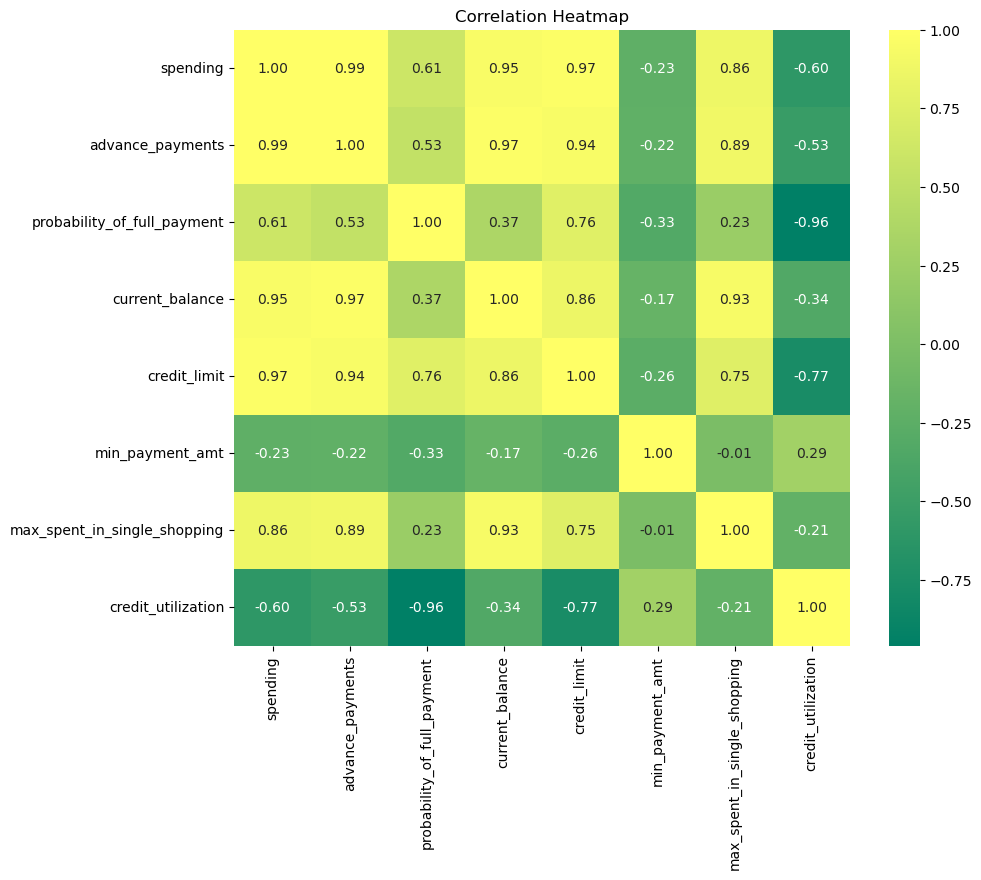

In [13]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='summer', square=True, )
plt.title('Correlation Heatmap')
plt.show()

##### Outlier Detection with Boxplots

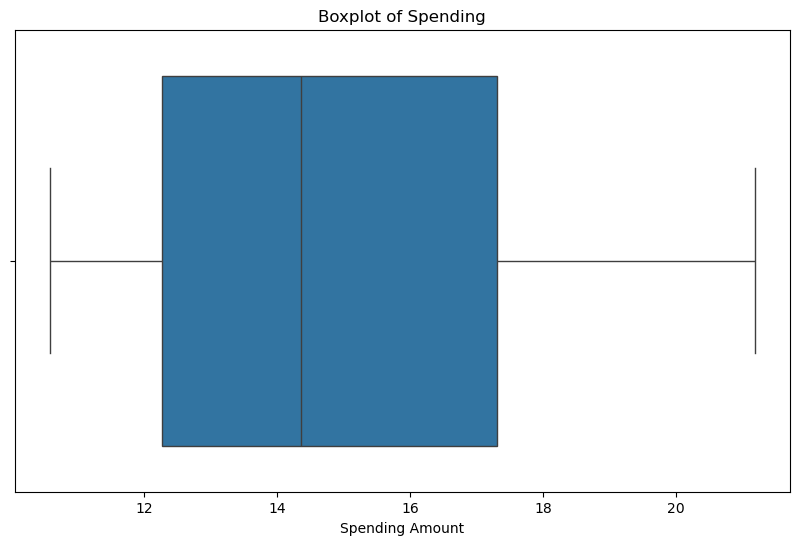

In [15]:
# Boxplot for outlier detection in spending
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['spending'])
plt.title('Boxplot of Spending')
plt.xlabel('Spending Amount')
plt.show()


## Data Preprocessing

##### Scaling Data

In [18]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['spending', 'advance_payments', 'probability_of_full_payment',
                    'current_balance', 'credit_limit', 'min_payment_amt',
                    'max_spent_in_single_shopping']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the scaled DataFrame
print(df.head())

   spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.178230         2.367533   
1  0.393582          0.253840                     1.501773        -0.600744   
2  1.413300          1.428192                     0.504874         1.401485   
3 -1.384034         -1.227533                    -2.591878        -0.793049   
4  1.082581          0.998364                     1.196340         0.591544   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0      1.338579        -0.298806                      2.328998   
1      0.858236        -0.242805                     -0.538582   
2      1.317348        -0.221471                      1.509107   
3     -1.639017         0.987884                     -0.454961   
4      1.155464        -1.088154                      0.874813   

   credit_utilization  
0            1.773851  
1            1.497208  
2            1.663915  
3            1.998485  
4       

In [19]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_utilization
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1.773851
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,1.497208
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1.663915
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,1.998485
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1.594478


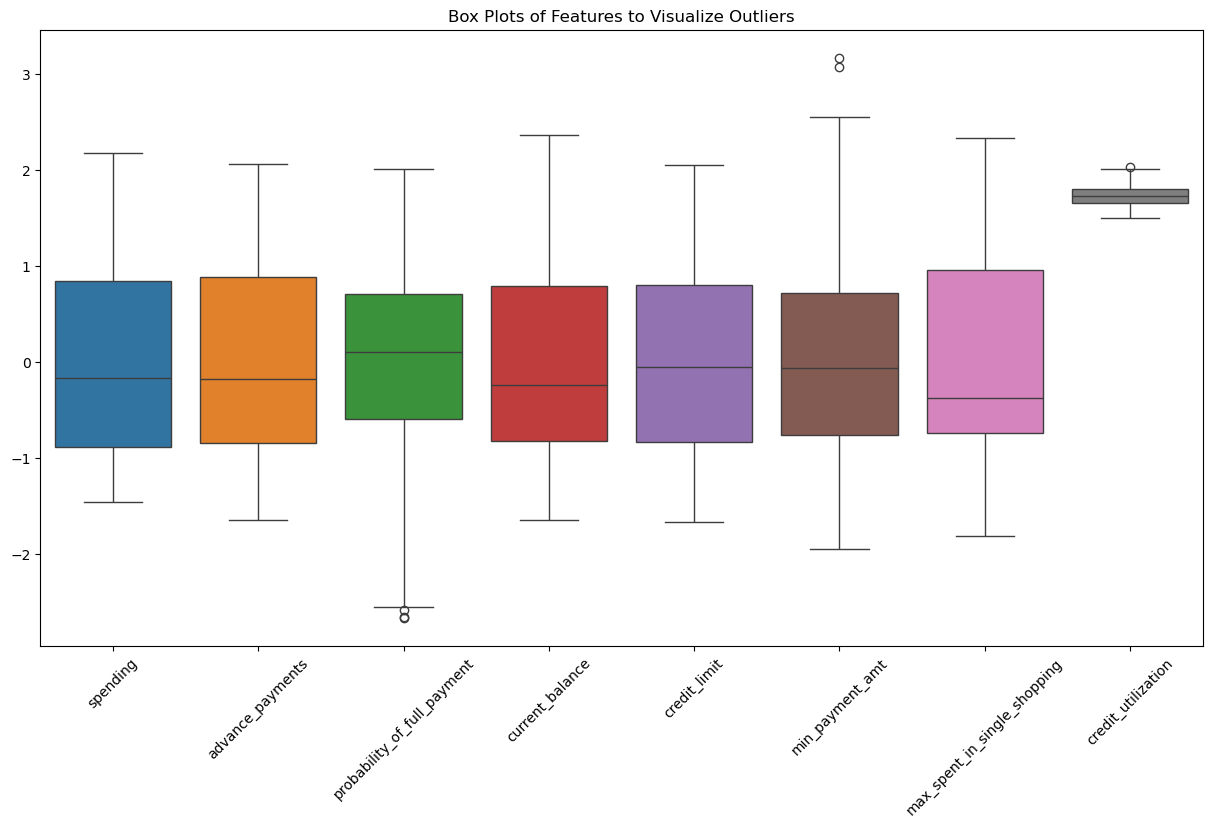

In [20]:
# Visualizing outliers using box plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Box Plots of Features to Visualize Outliers")
plt.xticks(rotation=45) #rotate x axis labels
plt.show()

#### Outlier Handling

In [22]:
cols_have_outlier = ['probability_of_full_payment', 'min_payment_amt']

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Example: Removing outliers from 'spending' column
for col in cols_have_outlier:
    df = remove_outliers_iqr(df, col)

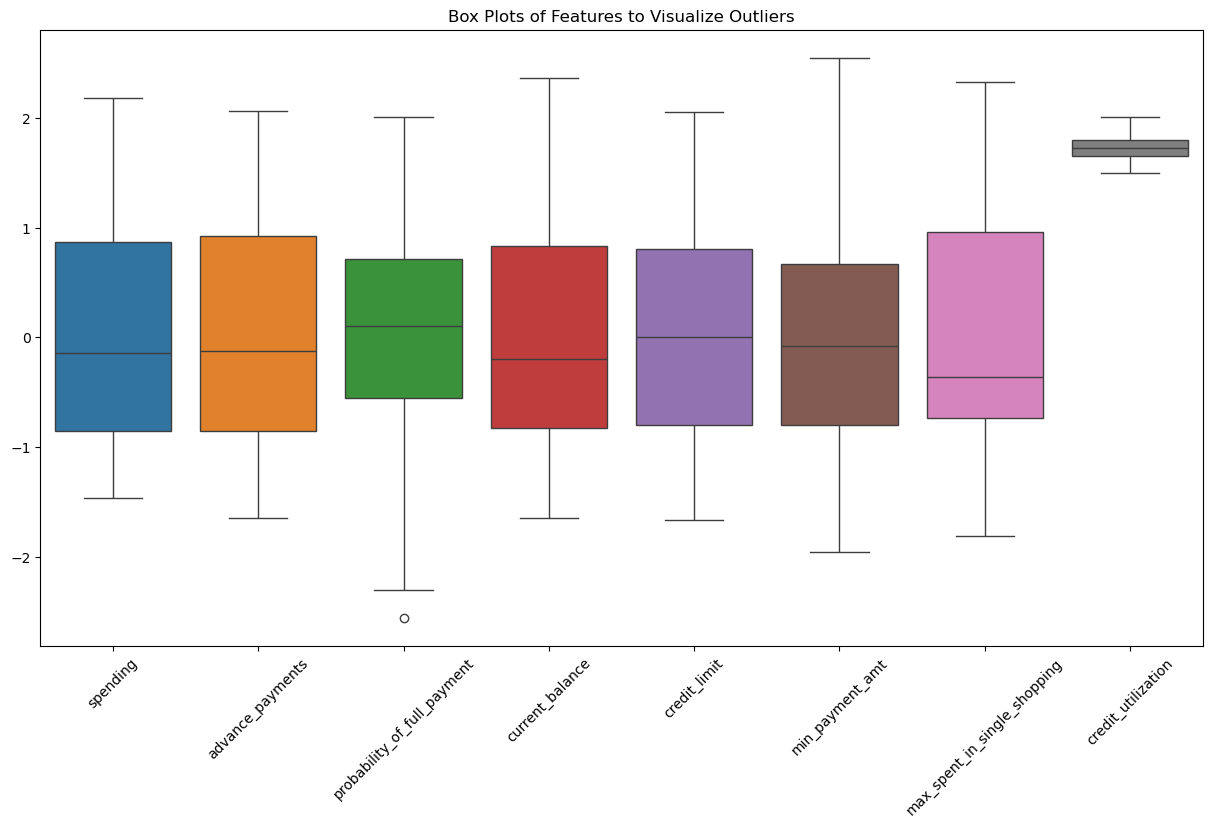

In [23]:
# Visualizing outliers using box plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Box Plots of Features to Visualize Outliers")
plt.xticks(rotation=45) #rotate x axis labels
plt.show()

### Dimensionality Reduction Using PCA

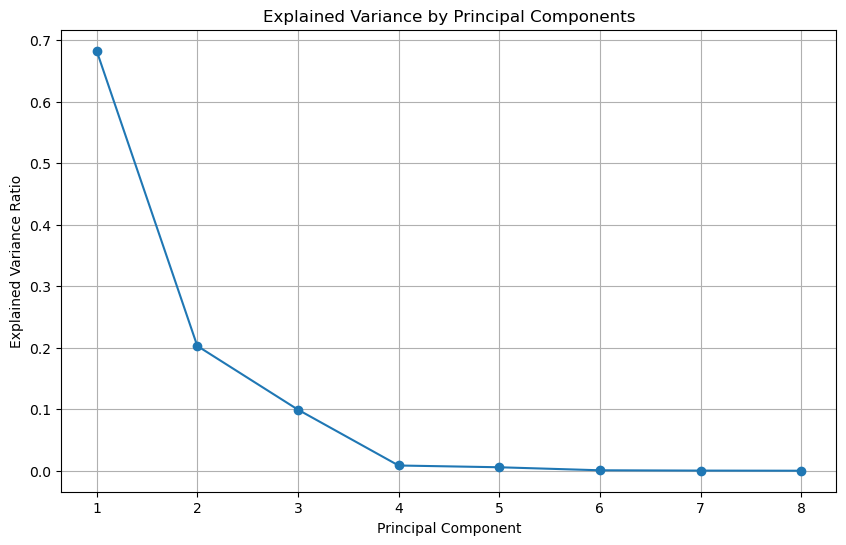

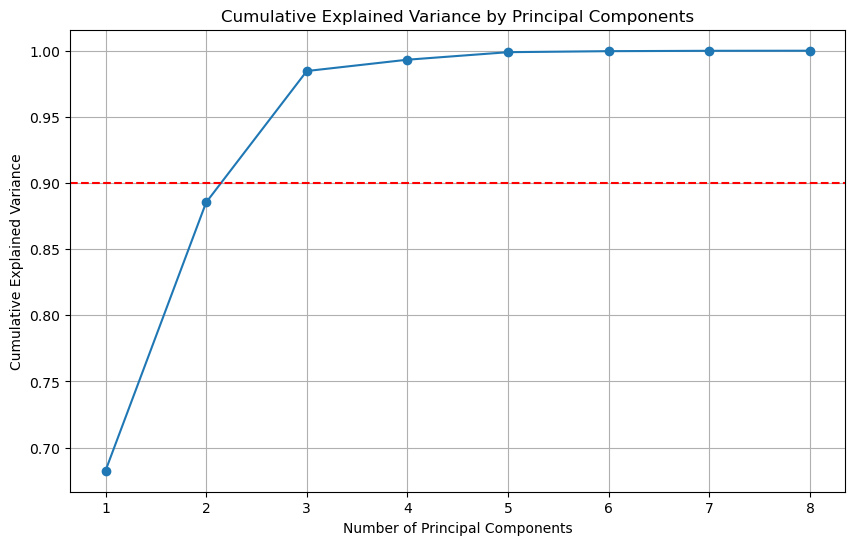

Reduced Data:
          PC1       PC2       PC3
0    3.713692  2.075368 -0.800940
1    1.323460 -2.348710  1.089830
2    3.140993  0.695457 -0.102849
3    2.739879 -0.980120 -0.347168
4   -2.472966  0.970309 -0.290590
..        ...       ...       ...
200 -0.772037 -1.230737  0.661614
201  1.129454  1.204318  0.579224
202 -0.442315 -1.471128 -0.873850
203  1.395399 -1.342421 -0.238855
204  0.365126  1.277018 -1.312086

[205 rows x 3 columns]


In [25]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')  # Example threshold for 90%
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid()
plt.show()

# Choosing the number of components
n_components = 3  # Adjust based on the plots

# Transforming the data
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_data)

# Creating a DataFrame for the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])

print("Reduced Data:")
print(reduced_df)

## Clustering Implementation 

### Hierarchical Clustering

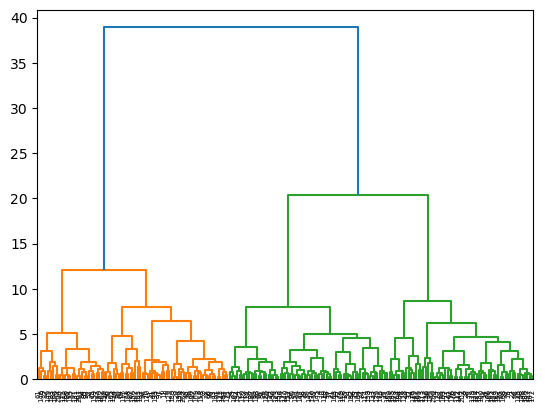

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

wardlink = linkage(df, method='ward')
dend = dendrogram(wardlink)

In [87]:
# Transform Data

# Initialize PCA with chosen number of components
n_components = 2  # Replace with your chosen number based on previous analysis
pca = PCA(n_components=n_components)

# Transform the data
pca_data = pca.fit_transform(df[columns_to_scale])

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the first few rows of the PCA-transformed DataFrame
print(pca_df.head())

        PC1       PC2
0  4.118919  1.049561
1  0.551561 -1.352736
2  3.127651  0.400743
3  2.391835 -1.000901
4 -2.040791  0.658883


###### We would "cut" the dendrogram by drawing a horizontal line around y = 12 or y = 18. Cutting at y=12 will give us three clusters, while cutting at y=18 will give us two.

### K-Means Clustering

C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

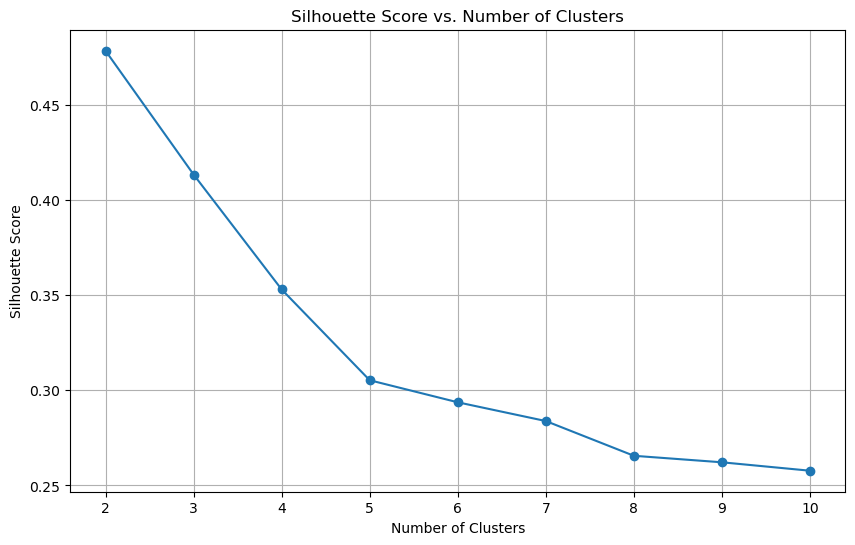

Optimal number of clusters: 2
   spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.178230         2.367533   
1  0.393582          0.253840                     1.501773        -0.600744   
2  1.413300          1.428192                     0.504874         1.401485   
4  1.082581          0.998364                     1.196340         0.591544   
6 -0.974080         -0.943539                    -0.878059        -0.630155   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0      1.338579        -0.298806                      2.328998   
1      0.858236        -0.242805                     -0.538582   
2      1.317348        -0.221471                      1.509107   
4      1.155464        -1.088154                      0.874813   
6     -1.190520         0.380540                     -0.204099   

   credit_utilization  cluster  
0            1.773851        0  
1            1.497208        1  

C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init = 'auto')
    cluster_labels = kmeans.fit_predict(pca_df)  # Use PCA-transformed data
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to determine optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Choose the optimal number of clusters based on silhouette score
optimal_clusters = range(2, 11)[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_clusters}')

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42,n_init='auto')
cluster_labels = kmeans.fit_predict(pca_df)

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Display the first few rows of the DataFrame with cluster labels
print(df.head())


##### Optimal number of clusters: 2

In [34]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
n_clusters = optimal_clusters  # Use the optimal number of clusters from K-Means

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

cluster_labels_hierarchical = agg_clustering.fit_predict(pca_df)

# Add hierarchical cluster labels to the DataFrame
df['cluster_hierarchical'] = cluster_labels_hierarchical

# Display the first few rows of the DataFrame with hierarchical cluster labels
print(df.head())


   spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.178230         2.367533   
1  0.393582          0.253840                     1.501773        -0.600744   
2  1.413300          1.428192                     0.504874         1.401485   
4  1.082581          0.998364                     1.196340         0.591544   
6 -0.974080         -0.943539                    -0.878059        -0.630155   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0      1.338579        -0.298806                      2.328998   
1      0.858236        -0.242805                     -0.538582   
2      1.317348        -0.221471                      1.509107   
4      1.155464        -1.088154                      0.874813   
6     -1.190520         0.380540                     -0.204099   

   credit_utilization  cluster  cluster_hierarchical  
0            1.773851        0                     1  
1            1.497

In [35]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,credit_utilization,cluster,cluster_hierarchical
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1.773851,0,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,1.497208,1,0
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1.663915,0,1
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1.594478,0,1
6,-0.974080,-0.943539,-0.878059,-0.630155,-1.190520,0.380540,-0.204099,1.903915,1,0


In [36]:
len(set(df['cluster_hierarchical']))

2

#### Evaluate Clustering Performance

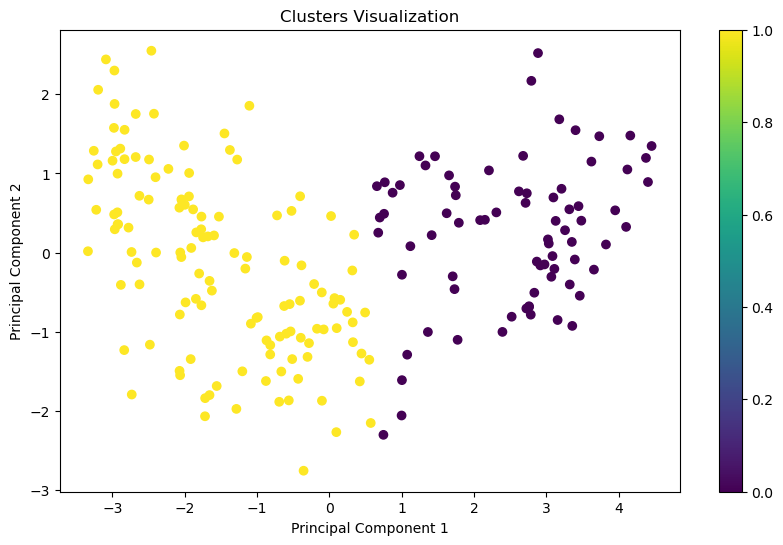

In [38]:
# Visualize clusters using scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['cluster'], cmap='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)  # Show colorbar to indicate cluster labels
plt.show()


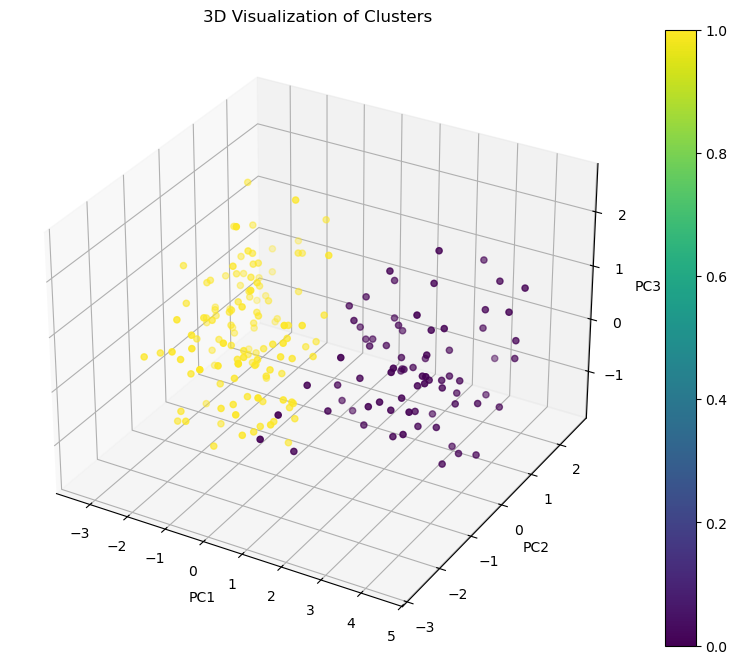

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                      c=df['cluster'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(scatter)
plt.title('3D Visualization of Clusters')
plt.show()


---

In [41]:
cluster_profiles = df.groupby('cluster')[columns_to_scale].mean()
print(cluster_profiles)

         spending  advance_payments  probability_of_full_payment  \
cluster                                                            
0        1.140654          1.147887                     0.543769   
1       -0.649497         -0.657447                    -0.276374   

         current_balance  credit_limit  min_payment_amt  \
cluster                                                   
0               1.128704      1.066613        -0.146525   
1              -0.650570     -0.602117         0.022232   

         max_spent_in_single_shopping  
cluster                                
0                            1.149620  
1                           -0.671342  


---

## DBSCAN

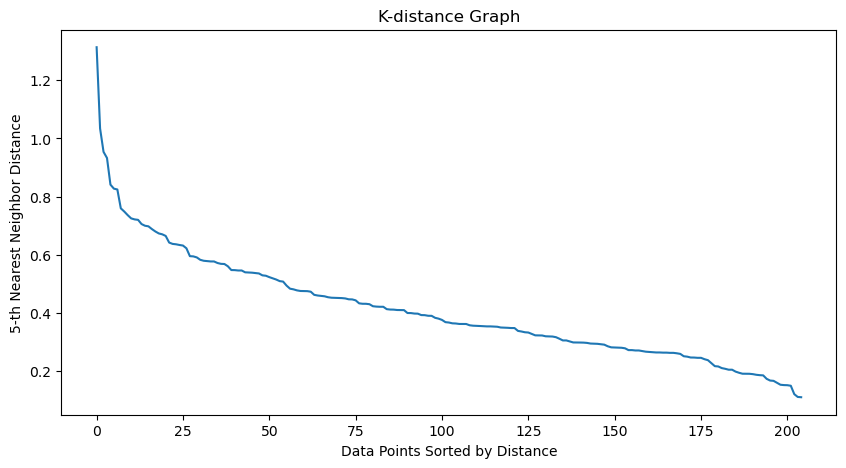

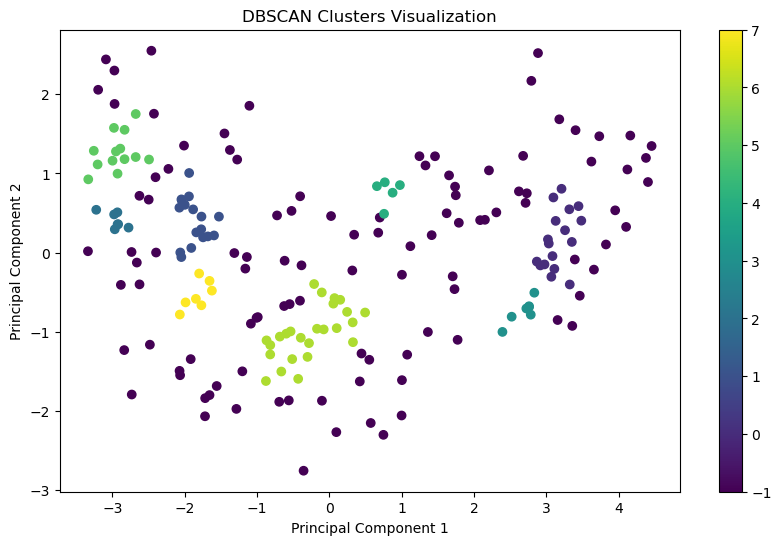

cluster_dbscan
-1    107
 6     25
 0     17
 1     17
 5     13
 3      7
 2      7
 7      7
 4      5
Name: count, dtype: int64


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Assuming pca_df is your DataFrame with PCA results ('PC1', 'PC2')

# 1. Finding optimal eps using k-distance graph
neighbors = NearestNeighbors(n_neighbors=5) # min_samples = 5
neighbors_fit = neighbors.fit(pca_df[['PC1', 'PC2']])
distances, indices = neighbors_fit.kneighbors(pca_df[['PC1', 'PC2']])
distances = distances[:, 4] #get the 5th nearest distances
distances = sorted(distances, reverse=True)
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('5-th Nearest Neighbor Distance')
plt.show()

# 2. Apply DBSCAN with tuned parameters
# Adjust eps based on the k-distance graph
dbscan = DBSCAN(eps=0.3, min_samples=5) # Example eps, adjust this
cluster_labels_dbscan = dbscan.fit_predict(pca_df[['PC1', 'PC2']])

# Add DBSCAN cluster labels to the original DataFrame
df['cluster_dbscan'] = cluster_labels_dbscan

# 3. Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['cluster_dbscan'], cmap='viridis')
plt.title('DBSCAN Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

# 4. evaluation.
print(df['cluster_dbscan'].value_counts()) #helps check the distribution of the clusters.

### Gaussian Mixture Model

C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

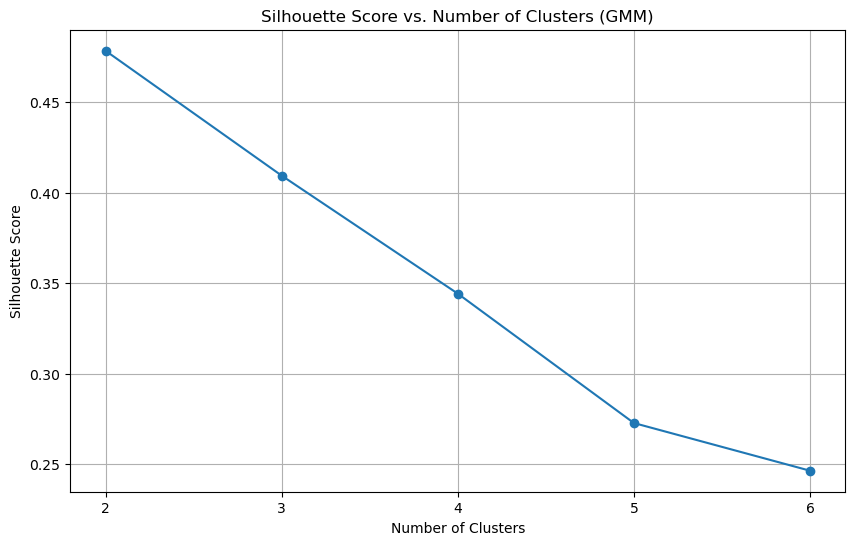

C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 7):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])
    silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2', 'PC3']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (GMM)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 7))
plt.grid()
plt.show()

# Apply GMM with the optimal number of clusters
optimal_clusters = range(2, 7)[np.argmax(silhouette_scores)]
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
cluster_labels = gmm.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])

# Add cluster labels to the original DataFrame
df['cluster_gmm'] = cluster_labels


### Spectral Clustering

C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


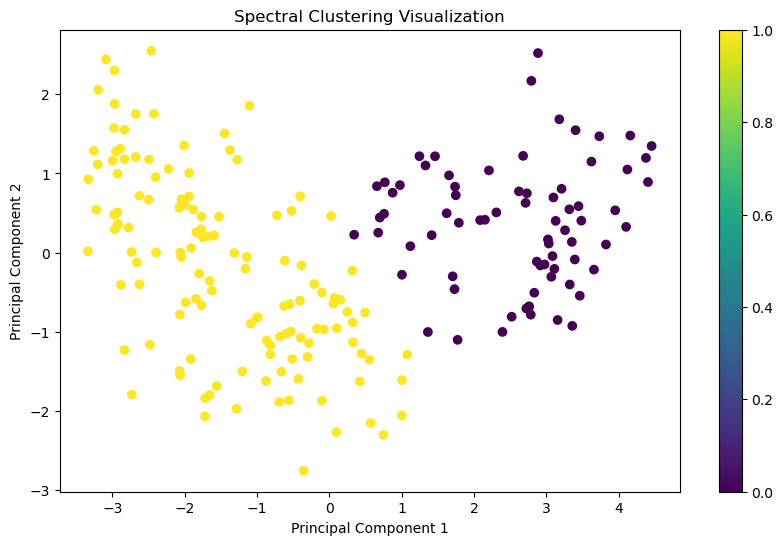

In [48]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=optimal_clusters, affinity='nearest_neighbors', random_state=42)
cluster_labels_spectral = spectral.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])

# Add Spectral Cluster labels to the original DataFrame
df['cluster_spectral'] = cluster_labels_spectral

# Visualize Spectral Clustering results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['cluster_spectral'], cmap='viridis')
plt.title('Spectral Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()


In [49]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[columns_to_scale])
df_scaled = pd.DataFrame(scaled_features, columns=columns_to_scale)

# List to store silhouette scores
silhouette_scores = {}

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
cluster_labels_kmeans = kmeans.fit_predict(df_scaled)
silhouette_kmeans = silhouette_score(df_scaled, cluster_labels_kmeans)
silhouette_scores['K-Means'] = silhouette_kmeans

# 2. Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels_hierarchical = agg_clustering.fit_predict(df_scaled)
silhouette_hierarchical = silhouette_score(df_scaled, cluster_labels_hierarchical)
silhouette_scores['Agglomerative'] = silhouette_hierarchical

# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
cluster_labels_dbscan = dbscan.fit_predict(df_scaled)
silhouette_dbscan = silhouette_score(df_scaled, cluster_labels_dbscan)
silhouette_scores['DBSCAN'] = silhouette_dbscan

# 4. Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
cluster_labels_gmm = gmm.fit_predict(df_scaled)
silhouette_gmm = silhouette_score(df_scaled, cluster_labels_gmm)
silhouette_scores['GMM'] = silhouette_gmm

# 5. Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
cluster_labels_spectral = spectral.fit_predict(df_scaled)
silhouette_spectral = silhouette_score(df_scaled, cluster_labels_spectral)
silhouette_scores['Spectral'] = silhouette_spectral

# Print silhouette scores
print("Silhouette Scores:")
for model, score in silhouette_scores.items():
    print(f"{model}: {score}")

# Determine the best performing model
best_model = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest Performing Model: {best_model} with Silhouette Score: {silhouette_scores[best_model]}")


Silhouette Scores:
K-Means: 0.4638505436516679
Agglomerative: 0.4457724430785156
DBSCAN: -0.20993944209206925
GMM: 0.44034299935844456
Spectral: 0.46417904743633365

Best Performing Model: Spectral with Silhouette Score: 0.46417904743633365


C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[columns_to_scale])
df_scaled = pd.DataFrame(scaled_features, columns=columns_to_scale)

# List to store silhouette scores
silhouette_scores = {}

# 5. Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
cluster_labels_spectral = spectral.fit_predict(df_scaled)
silhouette_spectral = silhouette_score(df_scaled, cluster_labels_spectral)
silhouette_scores['Spectral'] = silhouette_spectral
df['cluster'] = cluster_labels_spectral

# Print silhouette scores
print("Silhouette Scores:")
for model, score in silhouette_scores.items():
    print(f"{model}: {score}")

# Determine the best performing model
best_model = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest Performing Model: {best_model} with Silhouette Score: {silhouette_scores[best_model]}")



C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Scores:
Spectral: 0.46417904743633365

Best Performing Model: Spectral with Silhouette Score: 0.46417904743633365


In [91]:
cluster_profiles = df.groupby('cluster')[columns_to_scale].mean()
print(cluster_profiles)

         spending  advance_payments  probability_of_full_payment  \
cluster                                                            
0        1.179843          1.191724                     0.513648   
1       -0.616923         -0.626983                    -0.234863   

         current_balance  credit_limit  min_payment_amt  \
cluster                                                   
0               1.181133      1.090864        -0.067724   
1              -0.625648     -0.564961        -0.026462   

         max_spent_in_single_shopping  
cluster                                
0                            1.229831  
1                           -0.660521  


### Business Strategy Development Code

In [53]:
# Define business strategies based on cluster characteristics
business_strategies = {}

for cluster_num in cluster_profiles.index:
    cluster_data = cluster_profiles.loc[cluster_num]
    
    if cluster_num == 0:
        # Example: High spenders with low current balance
        business_strategies[cluster_num] = {
            "Description": "High Spenders",
            "Strategy": "Offer premium rewards and personalized services to retain high spenders."
        }
    elif cluster_num == 1:
        # Example: Moderate spenders with higher credit utilization
        business_strategies[cluster_num] = {
            "Description": "Moderate Spenders",
            "Strategy": "Encourage responsible credit usage and offer financial literacy programs."
        }

# Print business strategies for each cluster
for cluster_num, strategy in business_strategies.items():
    print(f"Cluster {cluster_num}: {strategy['Description']}")
    print(f"- Strategy: {strategy['Strategy']}")
    print("--------------------")


Cluster 0: High Spenders
- Strategy: Offer premium rewards and personalized services to retain high spenders.
--------------------
Cluster 1: Moderate Spenders
- Strategy: Encourage responsible credit usage and offer financial literacy programs.
--------------------
